<a href="https://colab.research.google.com/github/alharidt16/text-Analysis/blob/main/UAS_TEXT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester Mata Kuliah Text Analysis
- Nama : Al Haridt Mahmudi
- NIM  : 2008108010004

## Get Dataset
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi Threads

In [1]:
!pip install google_play_scraper

In [2]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [3]:
result = reviews_all(
        'com.instagram.barcelona',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

threads = pd.DataFrame.from_records(result)
threads = threads[['at','userName' ,'content', 'score' ]]

In [4]:
threads

,at,userName,content,score
0,2023-12-14 22:39:20,Ribout Rousdy,sementara,3
1,2023-12-06 08:17:41,Ahmad Hariyadi,Bagus,5
2,2023-11-22 23:57:52,Gusti ngurah,baik,4
3,2023-11-22 23:37:49,Yusuf Nur Rohman,Kalo bisa vidio porno bolh di share di threads,4
4,2023-11-22 22:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5
...,...,...,...,...
5313,2023-07-06 06:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5
5314,2023-07-06 06:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5
5315,2023-07-06 06:10:35,Rofiq sa'bani,Hello bruh,5
5316,2023-07-06 06:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [5]:
threads['at'] = pd.to_datetime(threads['at'])

# mengambil data dari tanggal 01-01-2023
data_review_threads= threads

In [6]:
data_review_threads

,at,userName,content,score
0,2023-12-14 22:39:20,Ribout Rousdy,sementara,3
1,2023-12-06 08:17:41,Ahmad Hariyadi,Bagus,5
2,2023-11-22 23:57:52,Gusti ngurah,baik,4
3,2023-11-22 23:37:49,Yusuf Nur Rohman,Kalo bisa vidio porno bolh di share di threads,4
4,2023-11-22 22:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5
...,...,...,...,...
5313,2023-07-06 06:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5
5314,2023-07-06 06:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5
5315,2023-07-06 06:10:35,Rofiq sa'bani,Hello bruh,5
5316,2023-07-06 06:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4


## Text PreProcessing

In [7]:
!pip install nltk
!pip install sastrawi


### Case with python with orbit data


In [8]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

data_review_threads['contentp'] = data_review_threads['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
data_review_threads['contentp_clean'] = all_preproc(data_review_threads['contentp'])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alharidt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 5318/5318 [00:02<00:00, 2037.31it/s]


In [9]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positif"
    elif rating == 3:
        return "Netral"
    elif (rating == 2) or (rating == 1):
        return "Negatif"
# Add sentiments to the data
data_review_threads["label"] = data_review_threads["score"].apply(sentiments)
data_review_threads

,at,userName,content,score,contentp,contentp_clean,label
0,2023-12-14 22:39:20,Ribout Rousdy,sementara,3,sementara,,Netral
1,2023-12-06 08:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,Positif
2,2023-11-22 23:57:52,Gusti ngurah,baik,4,baik,baik,Positif
3,2023-11-22 23:37:49,Yusuf Nur Rohman,Kalo bisa vidio porno bolh di share di threads,4,kalo bisa vidio porno bolh di share di threads,kalau video porno bolh share threads,Positif
4,2023-11-22 22:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5,suka aku karna hemat kuota saya berharap aplik...,suka aku karna hemat kuota harap aplikasi akan...,Positif
...,...,...,...,...,...,...,...
5313,2023-07-06 06:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,Positif
5314,2023-07-06 06:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,Positif
5315,2023-07-06 06:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,Positif
5316,2023-07-06 06:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,Positif


In [10]:
data_review_threads.label.value_counts()

label
Positif    3336
Negatif    1446
Netral      536
Name: count, dtype: int64

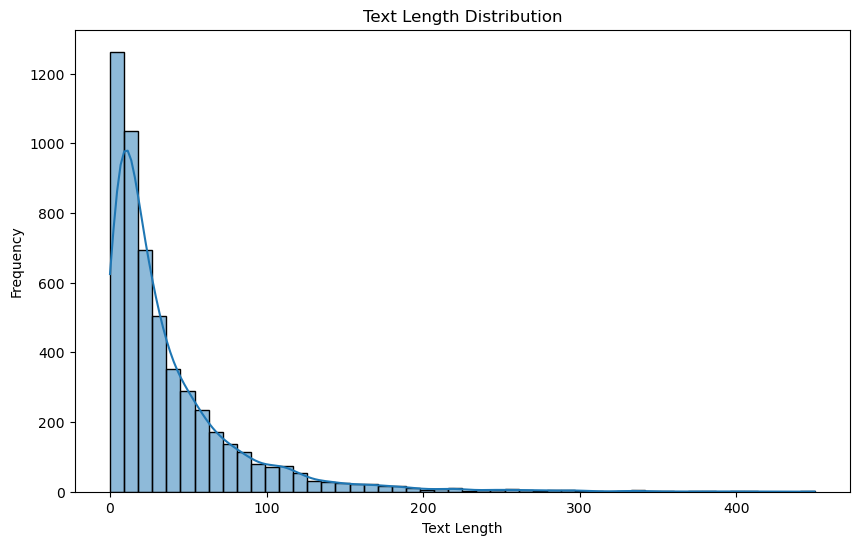

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data_review_threads['text_length'] = data_review_threads['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=data_review_threads, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

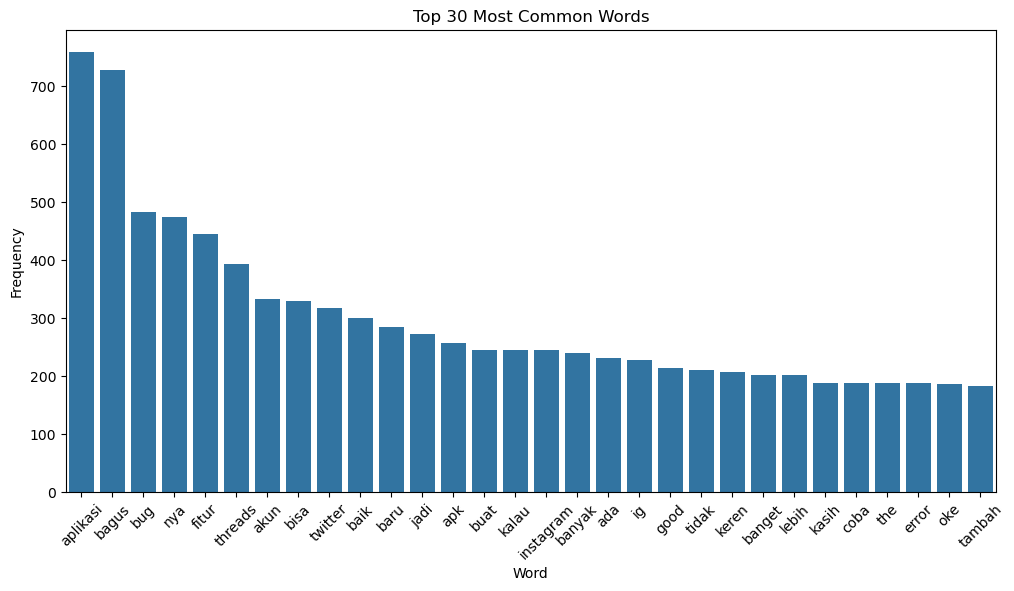

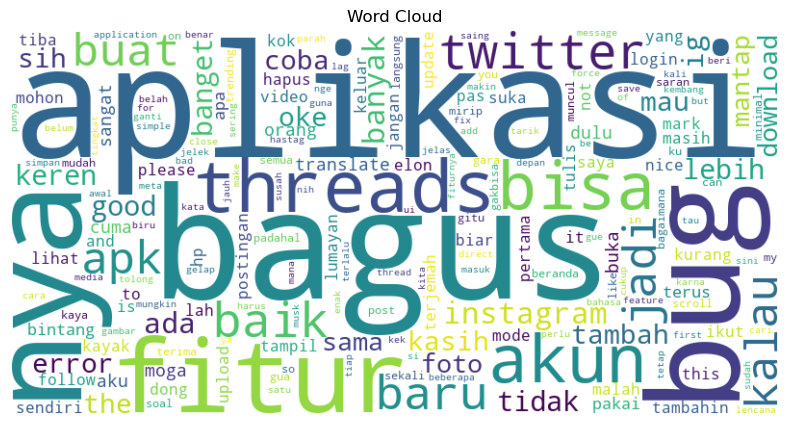

In [12]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(data_review_threads['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 30 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 30 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [13]:
#plotting the word cloud of negative values
a=data_review_threads.loc[data_review_threads['label']=='Negatif'][['contentp_clean','label']]
a

,contentp_clean,label
12,you use this aplikasi for propaganda,Negatif
13,zionis,Negatif
16,bagus,Negatif
19,ada fitur jangan putar otomatis video kasih bi...,Negatif
25,akun tidak nonaktif aktif badge threads ya,Negatif
...,...,...
5213,freeze wkwkw,Negatif
5216,beta banyak bug,Negatif
5265,the application still has lot of bugs one of w...,Negatif
5267,cukup elegan nyaman hari aplikasi ringan mudah...,Negatif


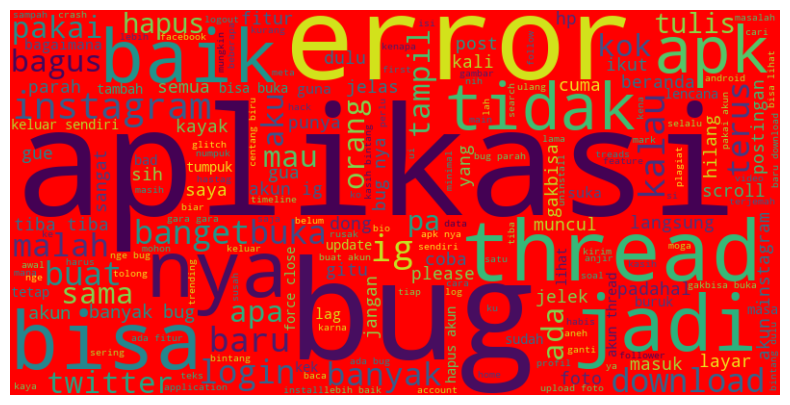

In [14]:
text_corpus = ' '.join(a['contentp_clean'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
#plotting the word cloud of neutral values
b=data_review_threads.loc[data_review_threads['label']=='Netral'][['contentp_clean','label']]
b

,contentp_clean,label
0,,Netral
10,susah,Netral
14,,Netral
22,banyak kurang kalau sebut jejer jejer,Netral
44,haha,Netral
...,...,...
5241,baru coba sih,Netral
5266,gg gaming,Netral
5273,error,Netral
5277,aplikasi pas mau upload photo kok tiba tiba me...,Netral


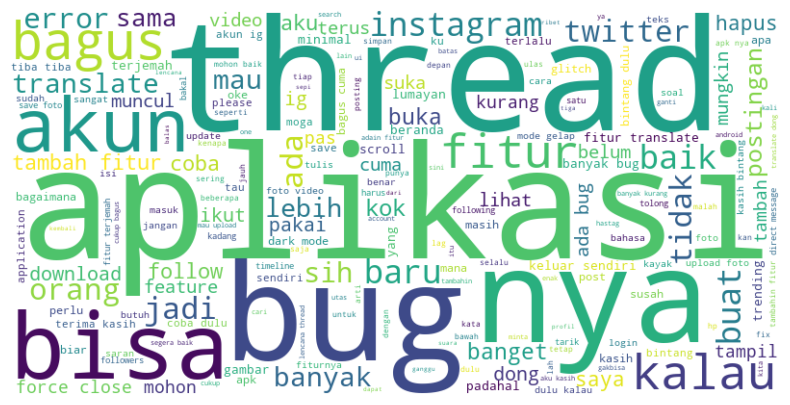

In [16]:
text_corpus = ' '.join(b['contentp_clean'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#plotting the word cloud of Positive values
c=data_review_threads.loc[data_review_threads['label']=='Positif'][['contentp_clean','label']]
c

,contentp_clean,label
1,bagus,Positif
2,baik,Positif
3,kalau video porno bolh share threads,Positif
4,suka aku karna hemat kuota harap aplikasi akan...,Positif
5,oke,Positif
...,...,...
5313,,Positif
5314,hiii aku cepat,Positif
5315,hello bruh,Positif
5316,baru coba meta sedang usaha saing twitter micr...,Positif


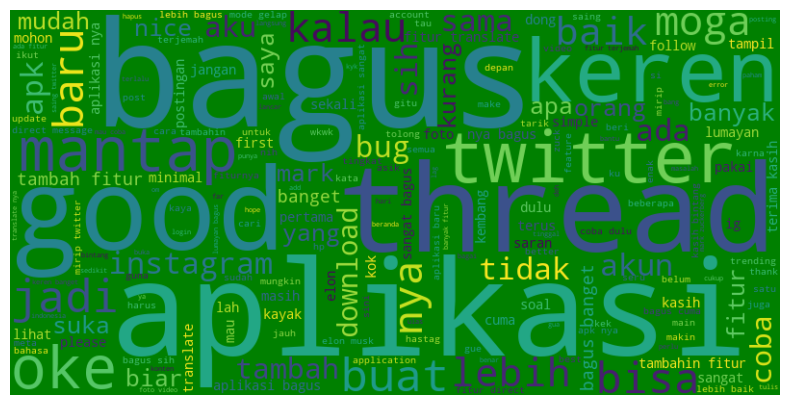

In [18]:
text_corpus = ' '.join(c['contentp_clean'].values)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_corpus)


# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
data_review_threads

,at,userName,content,score,contentp,contentp_clean,label,text_length
0,2023-12-14 22:39:20,Ribout Rousdy,sementara,3,sementara,,Netral,0
1,2023-12-06 08:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,Positif,5
2,2023-11-22 23:57:52,Gusti ngurah,baik,4,baik,baik,Positif,4
3,2023-11-22 23:37:49,Yusuf Nur Rohman,Kalo bisa vidio porno bolh di share di threads,4,kalo bisa vidio porno bolh di share di threads,kalau video porno bolh share threads,Positif,36
4,2023-11-22 22:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5,suka aku karna hemat kuota saya berharap aplik...,suka aku karna hemat kuota harap aplikasi akan...,Positif,71
...,...,...,...,...,...,...,...,...
5313,2023-07-06 06:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,Positif,0
5314,2023-07-06 06:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,Positif,14
5315,2023-07-06 06:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,Positif,10
5316,2023-07-06 06:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,Positif,151


<Axes: xlabel='score', ylabel='Count'>

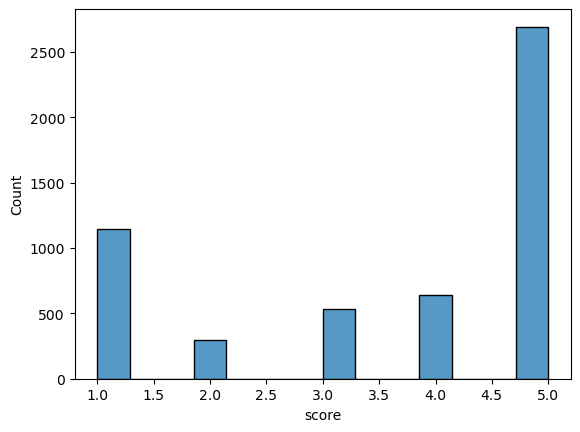

In [20]:
sns.histplot(x='score',data=data_review_threads)

In [22]:
data_review_threads

,at,userName,content,score,contentp,contentp_clean,label,text_length
0,2023-12-14 22:39:20,Ribout Rousdy,sementara,3,sementara,,Netral,0
1,2023-12-06 08:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,Positif,5
2,2023-11-22 23:57:52,Gusti ngurah,baik,4,baik,baik,Positif,4
3,2023-11-22 23:37:49,Yusuf Nur Rohman,Kalo bisa vidio porno bolh di share di threads,4,kalo bisa vidio porno bolh di share di threads,kalau video porno bolh share threads,Positif,36
4,2023-11-22 22:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5,suka aku karna hemat kuota saya berharap aplik...,suka aku karna hemat kuota harap aplikasi akan...,Positif,71
...,...,...,...,...,...,...,...,...
5313,2023-07-06 06:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,Positif,0
5314,2023-07-06 06:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,Positif,14
5315,2023-07-06 06:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,Positif,10
5316,2023-07-06 06:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,Positif,151


In [23]:
rev=data_review_threads.contentp_clean
rev

0                                                        
1                                                   bagus
2                                                    baik
3                    kalau video porno bolh share threads
4       suka aku karna hemat kuota harap aplikasi akan...
                              ...                        
5313                                                     
5314                                       hiii aku cepat
5315                                           hello bruh
5316    baru coba meta sedang usaha saing twitter micr...
5317                                            like this
Name: contentp_clean, Length: 5318, dtype: object

In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [25]:
ps=PorterStemmer()
rev=rev.apply(lambda x:[ps.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y: " ".join(y))
rev

0                                                        
1                                                    bagu
2                                                    baik
3                     kalau video porno bolh share thread
4       suka aku karna hemat kuota harap aplikasi akan...
                              ...                        
5313                                                     
5314                                       hiii aku cepat
5315                                           hello bruh
5316    baru coba meta sedang usaha sa twitter microbl...
5317                                             like thi
Name: contentp_clean, Length: 5318, dtype: object

In [26]:
from nltk.corpus import stopwords
st=stopwords.words('indonesian')
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if i.lower() not in st]).apply(lambda y: " ".join(y))
rev

0                                                        
1                                                    bagu
2                                                        
3                           video porno bolh share thread
4       suka karna hemat kuota harap aplikasi fitur di...
                              ...                        
5313                                                     
5314                                           hiii cepat
5315                                           hello bruh
5316    coba meta usaha sa twitter microblog aplikasi ...
5317                                             like thi
Name: contentp_clean, Length: 5318, dtype: object

In [27]:
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda y:" ".join(y))
rev

0                                                        
1                                                    bagu
2                                                        
3                           video porno bolh share thread
4       suka karna hemat kuota harap aplikasi fitur di...
                              ...                        
5313                                                     
5314                                           hiii cepat
5315                                           hello bruh
5316    coba meta usaha twitter microblog aplikasi rev...
5317                                             like thi
Name: contentp_clean, Length: 5318, dtype: object

TFIDF VECTORISATION

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(rev)
print(data_vec)
     

  (1, 268)	1.0
  (3, 3480)	0.23400722256351422
  (3, 3161)	0.43013273356163434
  (3, 486)	0.5714311348955639
  (3, 2795)	0.5714311348955639
  (3, 3712)	0.32735205429451925
  (4, 2528)	0.19886120232043222
  (4, 2186)	0.3116207152724464
  (4, 829)	0.3169513301487186
  (4, 1052)	0.20411062319630227
  (4, 177)	0.17332413376987552
  (4, 1334)	0.36819866822264247
  (4, 1855)	0.426914300128715
  (4, 1367)	0.426914300128715
  (4, 1665)	0.3353242748846553
  (4, 3324)	0.2804673538514416
  (5, 2572)	1.0
  (6, 2075)	1.0
  (7, 3443)	0.5343035430975066
  (7, 1956)	0.7454476691340464
  (7, 3480)	0.39853167554921914
  (8, 256)	1.0
  (9, 2765)	0.29622854588235414
  (9, 3631)	0.4878233843112093
  (9, 3256)	0.2398900604323705
  :	:
  (5312, 1411)	0.550607072961747
  (5312, 672)	0.5076567783283833
  (5312, 3460)	0.36654778503914287
  (5312, 2094)	0.3082017867425892
  (5312, 1048)	0.3536815826728493
  (5312, 3463)	0.29099856465513046
  (5314, 1391)	0.7964838552181547
  (5314, 611)	0.6046597955684051
  (531

In [29]:
y=data_review_threads['label'].values
y

array(['Netral', 'Positif', 'Positif', ..., 'Positif', 'Positif',
       'Positif'], dtype=object)

In [33]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size=0.2, random_state=1)


In [34]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:

sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[sv,dt,rf,ad]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

     Negatif       0.72      0.53      0.61       308
      Netral       0.29      0.02      0.03       110
     Positif       0.74      0.95      0.83       646

    accuracy                           0.73      1064
   macro avg       0.58      0.50      0.49      1064
weighted avg       0.69      0.73      0.68      1064

DecisionTreeClassifier()
              precision    recall  f1-score   support

     Negatif       0.67      0.56      0.61       308
      Netral       0.16      0.08      0.11       110
     Positif       0.75      0.87      0.81       646

    accuracy                           0.70      1064
   macro avg       0.53      0.51      0.51      1064
weighted avg       0.67      0.70      0.68      1064

RandomForestClassifier()
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 3.3 MB/s eta 0:00:05
    -------------------------------

In [45]:
y_new=model.predict(tf1.transform(["jelek sekali aplikasinya"]))
if y_new=="Negatif":
    print("Negatif")
if y_new=="Netral":
    print("Netral")
if y_new=="Positif":
    print("Positif")
     

Positif
